# 📘 Lasso Regression

## 📖 1. What Is Lasso?

**Lasso regression** is a form of **regularized linear regression** that adds an **L1 penalty** (absolute values of coefficients) to the loss function. This encourages **sparsity**, meaning it can **shrink some coefficients to exactly zero**, effectively performing **feature selection**.

---

## 🧠 Objective Function

Given data $ \{ (x_i, y_i) \}_{i=1}^n $, lasso minimizes:

$$
\mathcal{L}(\boldsymbol{\beta}) = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

- $ \lambda \geq 0 $: regularization strength
- Intercept $ \beta_0 $ is not penalized

---

### ✅ Comparison with Ridge

| Feature           | Ridge                      | Lasso                    |
|------------------|----------------------------|--------------------------|
| Penalty          | \( \ell_2 \) norm         | \( \ell_1 \) norm       |
| Shrinkage        | Shrinks all coefficients   | Some go to zero          |
| Feature selection| ❌ No                      | ✅ Yes                    |

---

## 📐 Matrix Form

There is no closed-form solution for Lasso. It’s solved via optimization algorithms such as **coordinate descent**.

---




## Simulated data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')

np.random.seed(42)
n, p = 100, 50
X = np.random.randn(n, p)
beta = np.zeros(p)
beta[:5] = 3
y = X @ beta + np.random.normal(0, 1, n)

In [2]:
# Fit Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_pred = lasso.predict(X)
print("Lasso R^2:", r2_score(y, y_pred))
print("Nonzero Coefficients:", np.sum(lasso.coef_ != 0))

Lasso R^2: 0.984795575472572
Nonzero Coefficients: 21


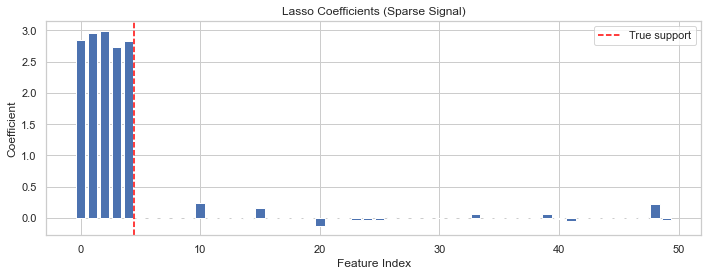

In [3]:
# Plot coefficients
plt.figure(figsize=(10, 4))
plt.bar(np.arange(p), lasso.coef_)
plt.axvline(4.5, color='red', linestyle='--', label='True support')
plt.title("Lasso Coefficients (Sparse Signal)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.legend()
plt.tight_layout()
plt.show()

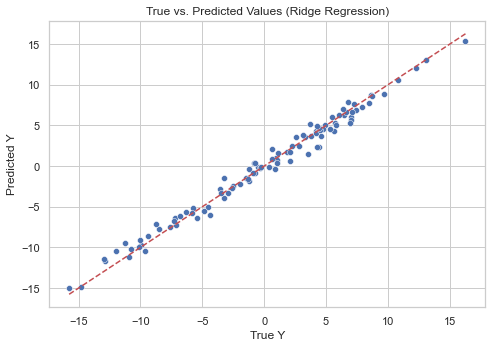

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (Ridge Regression)")
plt.tight_layout()
plt.show()

## 🏠 Real Data: California Housing

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare data
data = fetch_california_housing()
X_real = pd.DataFrame(data.data, columns=data.feature_names)
y_real = data.target
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Fit Lasso on real data
lasso_real = Lasso(alpha=0.1)
lasso_real.fit(X_train_scaled, y_train)
y_pred_real = lasso_real.predict(X_test_scaled)
print("R^2:", r2_score(y_test, y_pred_real))
print("MSE:", mean_squared_error(y_test, y_pred_real))
print("Nonzero Coefs:", np.sum(lasso_real.coef_ != 0))
print("Coefficients:", lasso_real.coef_)
print("Intercept:", lasso_real.intercept_)

R^2: 0.48136113250290735
MSE: 0.6796290284328825
Nonzero Coefs: 3
Coefficients: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]
Intercept: 2.071946937378876


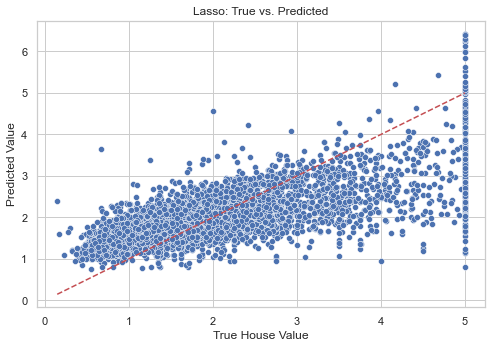

In [7]:
# Plot true vs predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True House Value")
plt.ylabel("Predicted Value")
plt.title("Lasso: True vs. Predicted")
plt.tight_layout()
plt.show()